# 画像ピラミッド
## 目的
このチュートリアルでは
* 画像ピラミッドについて学ぶ．
* “Orapple” という新種の果物を作成するために画像ピラミッドを使う．
* 次の関数の使い方を学ぶ: <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=cv2.pyrup#cv2.pyrUp" target="_blank"> cv2.pyrUp() </A>, <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=pyrdown#cv2.pyrDown" target="_blank"> cv2.pyrDown()</A>

## 理論
通常、我々は一定サイズの画像を使う．しかし，同一画像を様々な解像度で処理をする必要がある時もある．画像中で何かを探すとき(例えば顔)や、画像中にどのような大きさで現れるか分からないときがある．そのような状況では、様々な解像度の画像を用意し，そのすべての画像に対して物体検出を試みることを行う．これらの異なる解像度を持つ画像の集合を「画像ピラミッド」(最大解像度の画像を下に，最小解像度の画像を上に積むとピラミッドのようにみえる)と呼ぶ．

画像ピラミッドには 1) ガウシアン・ピラミッドと、 2) ラプラシアン・ピラミッドの2種類がある．

ガウシアン・ピラミッドを構築するには，まず初めに低レベル(高解像度)画像の連続している行と列を削除して高レベル(低解像度)画像を作る．次に高レベル画像中の各画素に周囲5画素の画素値にガウシアンで重み付けした値を設定する．このようにすることで，解像度が $M \times N$ の画像の解像度を $M/2 \times N/2$ に変更する．この変更によって画像の解像度が1/4に削減される．これをオクターブと呼ぶ．同様の処理をピラミッド中で高レベル方向に向かって(低解像度方向に向かって)続ける．同じように拡張すれば，レベルごとに解像度が4倍になる．ガウシアン・ピラミッドを得るには  <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=pyrdown#cv2.pyrDown" target="_blank"> cv2.pyrDown(src[, dst[, dstsize[, borderType]]])</A> と  <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=cv2.pyrup#cv2.pyrUp" target="_blank"> cv2.pyrUp(src[, dst[, dstsize[, borderType]]])</A> 関数を使う．` cv2.pyrDown()` 関数を使うと画像をボカし、ダウン・サンプルする．([対象画像](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/Figs/messi5.jpg))

![](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/_images/messipyr.jpg)

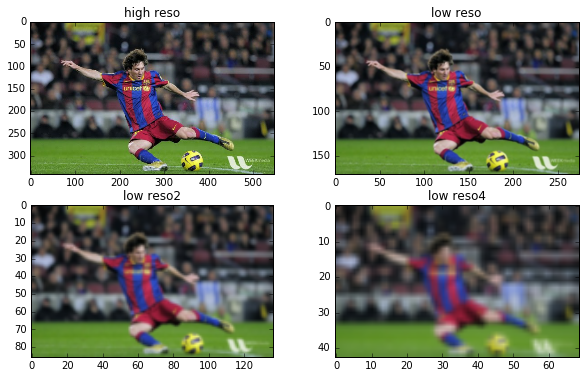

In [8]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg')
higher_reso = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
lower_reso = cv2.pyrDown(higher_reso)
lower_reso2 = cv2.pyrDown(lower_reso)
lower_reso4 = cv2.pyrDown(lower_reso2)

plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.imshow(higher_reso), plt.title('high reso')
plt.subplot(2,2,2), plt.imshow(lower_reso), plt.title('low reso')
plt.subplot(2,2,3),plt.imshow(lower_reso2), plt.title('low reso2')
plt.subplot(2,2,4),plt.imshow(lower_reso4), plt.title('low reso4')
plt.show()

今度は `cv2.pyrUp()` 関数を使ってアップサンプルをする

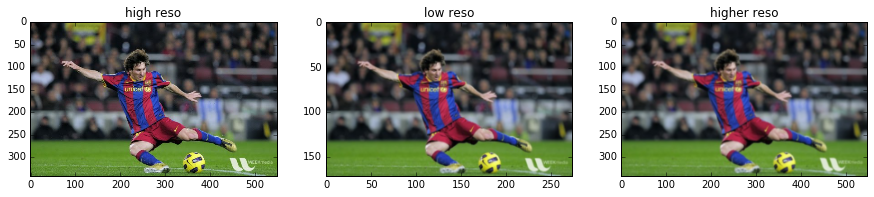

In [7]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg')
higher_reso = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
lower_reso = cv2.pyrDown(higher_reso)

higher_reso2 = cv2.pyrUp(lower_reso)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(higher_reso), plt.title('high reso')
plt.subplot(1,3,2)
plt.imshow(lower_reso), plt.title('low reso')
plt.subplot(1,3,3)
plt.imshow(higher_reso2), plt.title('higher reso')
plt.show()

一度ダウン・サンプリングによって解像度を下げたため， higher_reso2 は higher_reso と同じ画像にはならない点を覚えておこう．次の画像は先の例で得た最小の画像から作成した、レベルを3段階落とした画像である．原画像と比較してみてみよう:
![](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/_images/messiup.jpg)

ラプラシアン・ピラミッドはガウシアン・ピラミッドから作成する．このための関数は用意されていない．ラプラシアン・ピラミッドはエッジ画像のようなものである．大半の画素は0になるので，画像圧縮に使われる．ラプラシアン・ピラミッド中の1レベルは，ガウシアン・ピラミッド中の同一レベルの画像と，その上位レベルの画像をアップ・サンプルした画像の差分画像である．ラプラシアン・ピラミッドの3段階の画像を以下に示す(各画像のコントラストはエッジが見易いように調整してある):
![](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/_images/lap.jpg)

ピラミッドを使った画像の混合(ブレンディング)
画像ピラミッドのアプリケーションの一つとして画像の混合(ブレンディング)が挙げられる．例えば画像のスティッチング(stitching)では2枚の画像を同時に保持しておく必要があるが，画像間の不連続性が原因で良く見えないことがある．そのような状況において、ピラミッドを使った画像の混合(ブレンディング)により滑らかな画像の結合が得られる．昔からある例の一つがオレンジとリンゴの画像の混合(ブレンディング)である．次の結果を観れば何が言いたいか分かってもらえると思う:
![](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/_images/orapple.jpg)

補足資料の最初の文献を見ることを勧める．画像のブレンディングやラプラシアン・ピラミッドなどの詳細に関する図入りの説明が載っている．簡単に書くと以下のような処理になる:

1. オレンジとリンゴの2枚の画像を読み込む
2. 各画像のガウシアンピラミッドを計算(ピラミッドのレベルは6)
3. ガウシアンピラミッドからラプラシアンピラミッドを計算
4. ラプラシアンピラミッド中の各レベルでリンゴの左半分とオレンジの右半分の画像をつける
5. 結合した画像ピラミッドから元の画像を再構成する

以下にこのブレンディングを実行するためのコードを示す(簡単のために各処理を独立して行っているため、かなりメモリを消費する．必要であれば最適化してみよ): ([りんご画像](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/Figs/apple.jpg), [オレンジ画像](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/Figs/orange.jpg))

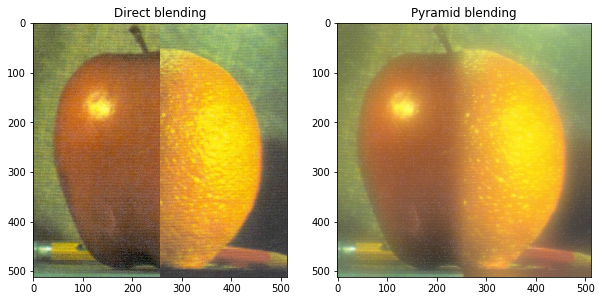

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np,sys

A = cv2.imread('apple.jpg')
B = cv2.imread('orange.jpg')

# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)

# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)

# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)

# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)

# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)

# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])

# image with direct connecting each half
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))

ls_ = cv2.cvtColor(ls_,cv2.COLOR_RGB2BGR)
real = cv2.cvtColor(real,cv2.COLOR_RGB2BGR)
cv2.imwrite('Pyramid_blending2.jpg',ls_)
cv2.imwrite('Direct_blending.jpg',real)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(real)
plt.title('Direct blending')
plt.subplot(1,2,2)
plt.imshow(ls_)
plt.title('Pyramid blending')
plt.show()

## 補足資料
* <A HREF="http://pages.cs.wisc.edu/~csverma/CS766_09/ImageMosaic/imagemosaic.html" target="_blank">画像のブレンディング(英語)</A>

## 目次
* [最初に戻る]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/usingOpenCV.html )
* 一つ上: OpenCVを使った画像処理<BR>
OpenCVが提供する様々な画像処理の関数について学ぶ
* 前の学習項目 [Canny法によるエッジ検出 canny.ipynb](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/canny.html)<BR>
Cannyのエッジ検出を学ぶ．
* 次の学習項目 <BR>
OpenCVにおける輪郭(領域) http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/contours.html (HTML) <BR>
OpenCVが提供する輪郭に関連する様々なものを学ぶ．